In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline
import sqlite3

# Ativos da Carteira

In [316]:
conn = sqlite3.connect('ativos.db')
cursor = conn.cursor()
#Cria o array de ativos e dos ativos com quantidade
query =" SELECT sigla, qtd FROM ativos WHERE moeda <> 'DIGITAL' AND moeda <> 'ACAO';"
cursor.execute(query)
ativos_qtd = {}
ativos = []
pesos = []
for linha in cursor:
    ativos_qtd[linha[0]] = linha[1] 
    ativos.append(linha[0]) 
conn.close()


In [317]:
start = datetime(2018,1,1)
ativos

['XPML11.SA', 'XPIN11.SA', 'XPLG11.SA']

In [318]:
#ativos/ações 
tickers= ativos

#busca os ativos de acordo com a data inicial 
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]= data.DataReader(t, data_source='yahoo', start=start)['Adj Close']


In [319]:
acoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2020-06-04 to 2021-01-27
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   XPML11.SA  160 non-null    float64
 1   XPIN11.SA  160 non-null    float64
 2   XPLG11.SA  160 non-null    float64
dtypes: float64(3)
memory usage: 5.0 KB


In [345]:
#ultima cotacao
acoes.tail(50)

,XPML11.SA,XPIN11.SA,XPLG11.SA
Date,,,
2020-11-11,113.599998,117.599998,127.500000
2020-11-12,113.239998,117.099998,128.500000
2020-11-13,112.970001,117.349998,127.980003
2020-11-16,112.000000,118.000000,128.000000
2020-11-17,112.000000,119.089996,128.020004
2020-11-18,111.790001,117.980003,128.279999
2020-11-19,109.550003,117.000000,128.699997
2020-11-23,109.099998,115.099998,129.199997
2020-11-24,108.330002,114.910004,128.830002


In [321]:
#Calcula o valor total das acoes na carteira - (ativo * qtd)
total = 0.0
for key, value in ativos_qtd.items():
    total += (acoes[key].tail(1).sum() * value)

#cria o array de  peso do ativos contidos na carteira    
pesos = []
for key, value in ativos_qtd.items():
     #"%.4f" % (acoes[key].tail(1).sum() *  value / total)
    pesos.append(round(acoes[key].tail(1).sum() *  value / total,4))

conn.close()    
#pega ultima cotação


In [322]:
pesos

[0.4963, 0.1626, 0.3411]

In [323]:
#weights = np.array([0.2103,0.1383,0.2540,0.1187,0.0728,0.2059])
#weights = np.array(pesos)
total

1411.1600341796875

# Retornos

In [324]:
#retorno diario dos aivos
returns = acoes / acoes.shift(1) - 1
returns.head()

,XPML11.SA,XPIN11.SA,XPLG11.SA
Date,,,
2020-06-04,NaN,NaN,NaN
2020-06-05,0.021167,-0.001909,0.015137
2020-06-08,0.024276,0.017391,0.009714
2020-06-09,-0.004467,-0.011026,0.003966
2020-06-10,0.010530,0.000259,0.015466


# Obtendo a Fronteira Eficiente Markowitz

In [325]:
log_returns = np.log(acoes / acoes.shift(1)) 
log_returns.max()

XPML11.SA    0.026891
XPIN11.SA    0.018467
XPLG11.SA    0.048636
dtype: float64

In [326]:
#retorno anual
log_returns.mean() * 250

XPML11.SA    0.168313
XPIN11.SA   -0.006701
XPLG11.SA    0.062917
dtype: float64

In [327]:
log_returns.cov() * 250

,XPML11.SA,XPIN11.SA,XPLG11.SA
XPML11.SA,0.024877,0.003678,0.004039
XPIN11.SA,0.003678,0.010030,0.002832
XPLG11.SA,0.004039,0.002832,0.030576


In [328]:
#correlação entre os ativos
log_returns.corr()

,XPML11.SA,XPIN11.SA,XPLG11.SA
XPML11.SA,1.000000,0.232826,0.146438
XPIN11.SA,0.232826,1.000000,0.161716
XPLG11.SA,0.146438,0.161716,1.000000


In [329]:
num_assets = len(tickers)
num_assets

3

In [330]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
#weights = np.array(pesos)
weights

array([0.35854365, 0.30310835, 0.338348  ])

In [332]:
#weights[0] + weights[1] + weights[2] + weights[3] + weights[4] + weights[5] +  weights[6] +  weights[7] + weights[8]
weights[0] + weights[1] + weights[2] 

1.0

In [333]:
#Expected Portofolio Retrun
np.sum(weights * log_returns.mean()) * 250

0.07960430190709142

In [334]:
#Expected Portofolio Variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.009979996728515527

In [335]:
#Expected Portofolio Volatility
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.09989993357613171

In [336]:
pfolio_returns =[]
pfolio_volatilities = []

for x in range(360):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns



array([0.14736889, 0.04387239, 0.01959732, 0.08506575, 0.07633406,
       0.0560202 , 0.06612734, 0.01053594, 0.08222597, 0.12276742,
       0.0696493 , 0.09485147, 0.05210836, 0.10454188, 0.08146573,
       0.08365673, 0.11690291, 0.06127881, 0.08436279, 0.05830011,
       0.0743667 , 0.05608583, 0.07961552, 0.04359815, 0.05542834,
       0.08627128, 0.09497472, 0.0843557 , 0.06262274, 0.07086521,
       0.08567476, 0.06815217, 0.08719749, 0.11941284, 0.1026472 ,
       0.07486299, 0.07038903, 0.07634588, 0.13570478, 0.03778044,
       0.06532914, 0.10179241, 0.03169244, 0.07938383, 0.0797196 ,
       0.02391769, 0.08319484, 0.08221216, 0.09647772, 0.09227828,
       0.03906037, 0.0951397 , 0.11039262, 0.10978441, 0.0680237 ,
       0.06690411, 0.08354392, 0.03738099, 0.08933546, 0.10187273,
       0.05785276, 0.05737589, 0.06742518, 0.0708742 , 0.08471032,
       0.07356803, 0.07010683, 0.09669549, 0.08703421, 0.09562652,
       0.10031567, 0.07147556, 0.09909871, 0.04167887, 0.07379

In [337]:
pfolio_volatilities

array([0.13593705, 0.09265444, 0.09157757, 0.10006622, 0.10983735,
       0.09295287, 0.09202676, 0.09266165, 0.10240288, 0.11919329,
       0.12461735, 0.1086507 , 0.08905912, 0.11866544, 0.0983167 ,
       0.09860255, 0.11596855, 0.09706979, 0.10155042, 0.09764268,
       0.09858655, 0.11823132, 0.11248424, 0.09857743, 0.09059914,
       0.09898295, 0.10329547, 0.09882642, 0.11213932, 0.1194147 ,
       0.10940382, 0.09681113, 0.11532074, 0.12535145, 0.11191354,
       0.13430392, 0.09305313, 0.09502433, 0.1275618 , 0.10374754,
       0.09213977, 0.10674583, 0.09012915, 0.11853029, 0.09626237,
       0.08873968, 0.10308496, 0.12342762, 0.11680742, 0.10231716,
       0.1099962 , 0.10318787, 0.11976023, 0.11909413, 0.09954518,
       0.09771902, 0.1172278 , 0.0910457 , 0.10450757, 0.11461562,
       0.09376801, 0.09019117, 0.10782915, 0.09340039, 0.10058832,
       0.09646467, 0.09830705, 0.10405743, 0.1402949 , 0.10649021,
       0.10761009, 0.09441851, 0.1205355 , 0.09862588, 0.09405

In [338]:
pfolio = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [339]:
pfolio.head()

,Return,Volatility
0,0.147369,0.135937
1,0.043872,0.092654
2,0.019597,0.091578
3,0.085066,0.100066
4,0.076334,0.109837


In [340]:
pfolio.tail()

,Return,Volatility
355,0.071541,0.093979
356,0.068892,0.097898
357,0.131603,0.125108
358,0.033497,0.091927
359,0.080726,0.097183


Text(0, 0.5, 'Expected Return')

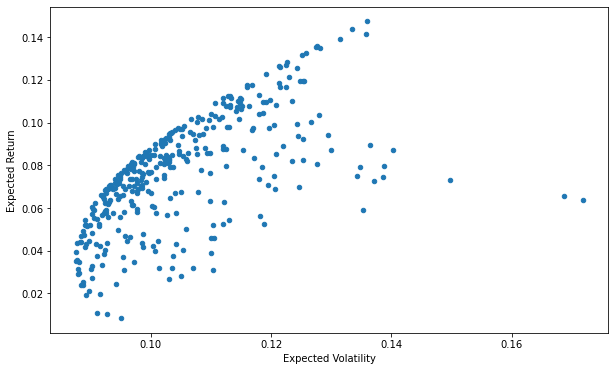

In [341]:
pfolio.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')


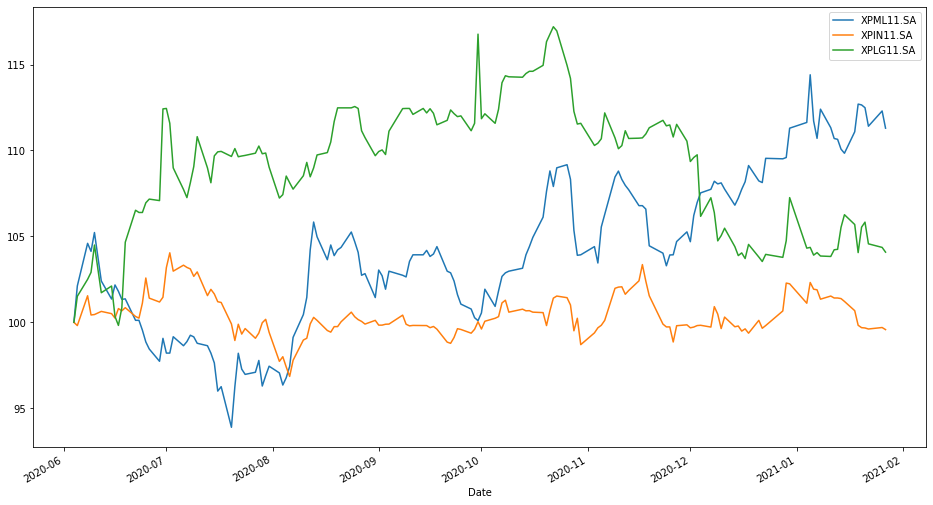

In [342]:
#normaliza atual / primeira * 100 neste caso toda a primeira será 100 tendo assim um ponto de referência
#evolução das ações(dados do yahoo finance)
(acoes / acoes.iloc[0] * 100).plot(figsize = (16,9));
plt.legend()
plt.show()

In [346]:
#retornos anuais dos ativos
retornos_anual = returns.mean() * 250
retornos_anual

XPML11.SA    0.180739
XPIN11.SA   -0.001716
XPLG11.SA    0.078144
dtype: float64

In [348]:
# Retorno anual da carteira com seus respectivos pesos - pega os valores do yahoo finance. 
portofolio_1 = str(round(np.dot(retornos_anual, pesos),5) *100) + ' %'
#portofolio_1 = str(round(np.dot(retornos_anual, weights) *100, 5)) + ' %'
print(portofolio_1) 


11.608 %


# Correlação

In [349]:
def plot_corr(corr):
    # Cortaremos a metade de cima pois é o espelho da metade de baixo
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True

    sns.heatmap(corr, mask=mask, cmap='RdBu', center=0, square=True, linewidths=.5,annot=True  )

,XPML11.SA,XPIN11.SA,XPLG11.SA
XPML11.SA,1.000000,0.138111,-0.223295
XPIN11.SA,0.138111,1.000000,-0.026913
XPLG11.SA,-0.223295,-0.026913,1.000000


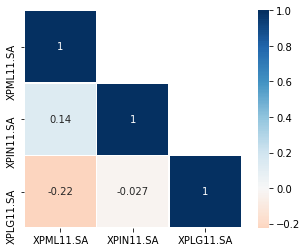

In [350]:
#Correlações entre os ativos da carteira
#plt.figure(figsize=(16,8))
plot_corr(acoes.corr())
acoes.corr()

In [ ]:
#plt.figure(figsize=(10,6))
#sns.heatmap(acoes.corr() ,cmap='RdBu', square=True, linewidths=.2,annot=True)


In [351]:
acoes.skew()

XPML11.SA    0.094479
XPIN11.SA    0.444637
XPLG11.SA   -0.314501
dtype: float64

In [353]:
acoes.kurt(axis=0)

XPML11.SA   -0.709089
XPIN11.SA    0.712014
XPLG11.SA   -0.488336
dtype: float64

array([[<AxesSubplot:title={'center':'XPML11.SA'}>,
        <AxesSubplot:title={'center':'XPIN11.SA'}>],
       [<AxesSubplot:title={'center':'XPLG11.SA'}>, <AxesSubplot:>]],
      dtype=object)

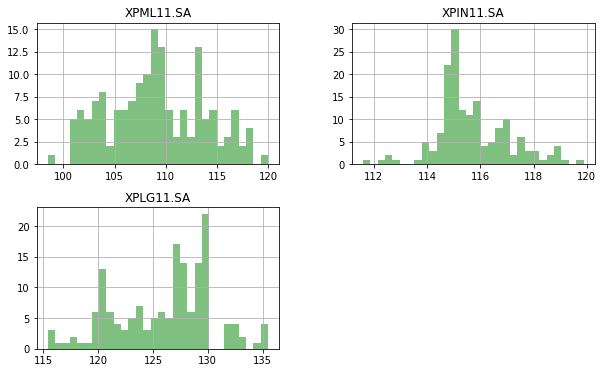

In [355]:
#FUNDOS IMOBILIARIOS
acoes[['XPML11.SA','XPIN11.SA','XPLG11.SA']].hist(bins=30,alpha=0.5,color='Green',figsize=(10,6))